In [ ]:
# 1. What is a Support Vector Machine (SVM)?

# Answer:
# A Support Vector Machine is a supervised learning algorithm used for classification and regression.
# It finds a hyperplane (in feature space) that best separates classes by maximizing the margin — the distance between the hyperplane and the nearest data points from each class (support vectors).
# For non-linearly separable data, SVM uses kernel functions to map data into higher-dimensional spaces where separation is possible.

In [ ]:
# 2. Difference between Hard Margin and Soft Margin SVM

# Answer:

# Hard Margin SVM: Assumes data is linearly separable — finds a hyperplane that perfectly classifies training examples (no misclassifications). Not robust to noise/outliers.

# Soft Margin SVM: Allows some misclassifications via slack variables ξᵢ and penalty parameter C. Balances margin maximization with classification errors; more robust to noise.

In [ ]:
# 3. Mathematical Intuition behind SVM
# SVM minimizes ½||w||² subject to yᵢ(wᵗxᵢ + b) ≥ 1 for all i. For soft margin, slack variables ξᵢ allow violations: minimize ½||w||² + CΣξᵢ.


In [ ]:
# 4. Role of Lagrange Multipliers in SVM
# Lagrange multipliers transform the constrained optimization problem into its dual form, depending only on dot products, enabling kernel usage.


In [ ]:
# 5. Support Vectors
# Support vectors are the data points closest to the hyperplane that define its position and orientation.

In [ ]:
# 6. Support Vector Classifier (SVC)
# SVC is the implementation of SVM for classification tasks, supporting multiple kernels and soft margins.

In [ ]:
# 7. Support Vector Regressor (SVR)
# SVR extends SVM to regression by fitting a function within an epsilon-insensitive tube minimizing deviations beyond ε.

In [ ]:
# 8. Kernel Trick
# The kernel trick computes dot products in high-dimensional spaces implicitly, allowing nonlinear classification using kernels like RBF or polynomial.

In [ ]:
# 9. Compare Linear, Polynomial, and RBF Kernels
# Linear: simple and fast; Polynomial: flexible but may overfit; RBF: effective nonlinear separation but requires gamma tuning.

In [ ]:
# 10. Effect of the C Parameter in SVM
# C balances margin width and misclassification penalty. Larger C fits data closely (risk overfitting); smaller C increases regularization.

In [ ]:
# 11. Role of Gamma Parameter in RBF Kernel SVM
# Gamma defines influence radius of samples. High gamma → small radius (overfitting); low gamma → large radius (underfitting).

In [ ]:
# 12. What is Naïve Bayes and why 'Naïve'?
# Naïve Bayes applies Bayes’ theorem with the naive assumption of feature independence given the class label.

In [ ]:
# 13. Bayes’ Theorem
# P(y|x) = P(x|y)P(y)/P(x)

In [ ]:
# 14. Gaussian, Multinomial, Bernoulli Naïve Bayes
# Gaussian: continuous features; Multinomial: count data; Bernoulli: binary features.

In [ ]:
# 15. When to use Gaussian Naïve Bayes
# When features are continuous and approximately normally distributed.

In [ ]:
# 16. Key assumptions of Naïve Bayes
# Features are conditionally independent given the class, and their distributions match the model’s assumed likelihood.

In [ ]:
# 17. Advantages and Disadvantages of Naïve Bayes
# Advantages: simple, fast, effective on high-dimensional data. Disadvantages: independence assumption unrealistic, zero probability issues.

In [ ]:
# 18. Why good for text classification
# Text data is sparse and high-dimensional; Naïve Bayes efficiently handles feature independence and performs well with TF-IDF features.

In [ ]:
# 19. Compare SVM and Naïve Bayes
# SVM: higher accuracy, slower training; Naïve Bayes: simpler, faster, suitable for large sparse text datasets.

In [ ]:
# 20. Laplace Smoothing in Naïve Bayes
# Adds small constant α to feature counts to avoid zero probabilities for unseen words or categories.

## Practical Answers        

In [ ]:
# Practical Answers

In [3]:
# 21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = datasets.load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.3,random_state=42)
clf = SVC(kernel='rbf',gamma='scale')
clf.fit(X_train,y_train)
print("Accuracy:", accuracy_score(y_test,clf.predict(X_test)))

Accuracy: 1.0


In [5]:
# 22. P2. Train two SVM classifiers with Linear and RBF kernels on the Wine dataset, compare accuracies
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X,y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print("Accuracy:", GaussianNB().fit(X_train,y_train).score(X_test,y_test))


Accuracy: 0.9415204678362573


In [6]:
# 23 Train an SVR on a housing dataset and evaluate with MSE
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_wine
data = load_wine()
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.3,random_state=42)
params = {'C':[0.1,1,10],'gamma':['scale',0.1],'kernel':['rbf','poly']}
grid = GridSearchCV(SVC(),params,cv=5)
grid.fit(X_train,y_train)
print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}


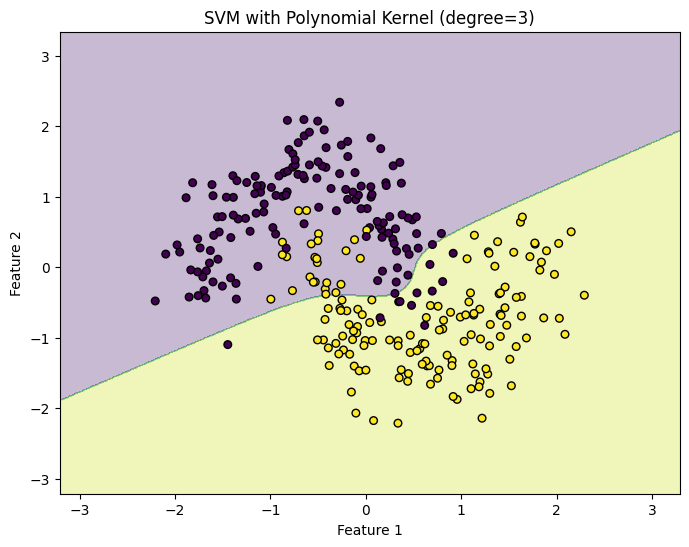

In [7]:
# 24  SVM Classifier with Polynomial Kernel and visualize decision boundary
# P4: Polynomial kernel and decision boundary visualization (2D)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

X, y = datasets.make_moons(n_samples=300, noise=0.2, random_state=42)
scaler = StandardScaler(); X = scaler.fit_transform(X)

clf = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', probability=False)
clf.fit(X, y)

# plot decision boundary
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 500),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 500))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, s=30, edgecolors='k')
plt.title("SVM with Polynomial Kernel (degree=3)")
plt.xlabel("Feature 1"); plt.ylabel("Feature 2")
plt.show()


In [8]:
# 25 Train Gaussian Naïve Bayes on Breast Cancer dataset and evaluate accuracy
# P5: GaussianNB on Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=data.target_names))


Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

   malignant       0.97      0.89      0.93        64
      benign       0.94      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [9]:
# 26  Train Multinomial Naïve Bayes for text classification using 20 Newsgroups

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

cats = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, remove=('headers','footers','quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=cats, remove=('headers','footers','quotes'))

model = make_pipeline(TfidfVectorizer(), MultinomialNB(alpha=1.0))
model.fit(newsgroups_train.data, newsgroups_train.target)
preds = model.predict(newsgroups_test.data)

print("Accuracy:", accuracy_score(newsgroups_test.target, preds))
print(classification_report(newsgroups_test.target, preds, target_names=cats))


Accuracy: 0.6691078561917443
                        precision    recall  f1-score   support

           alt.atheism       0.96      0.08      0.16       319
soc.religion.christian       0.94      0.83      0.88       389
         comp.graphics       0.96      0.67      0.79       396
               sci.med       0.46      0.98      0.63       398

              accuracy                           0.67      1502
             macro avg       0.83      0.64      0.61      1502
          weighted avg       0.82      0.67      0.63      1502



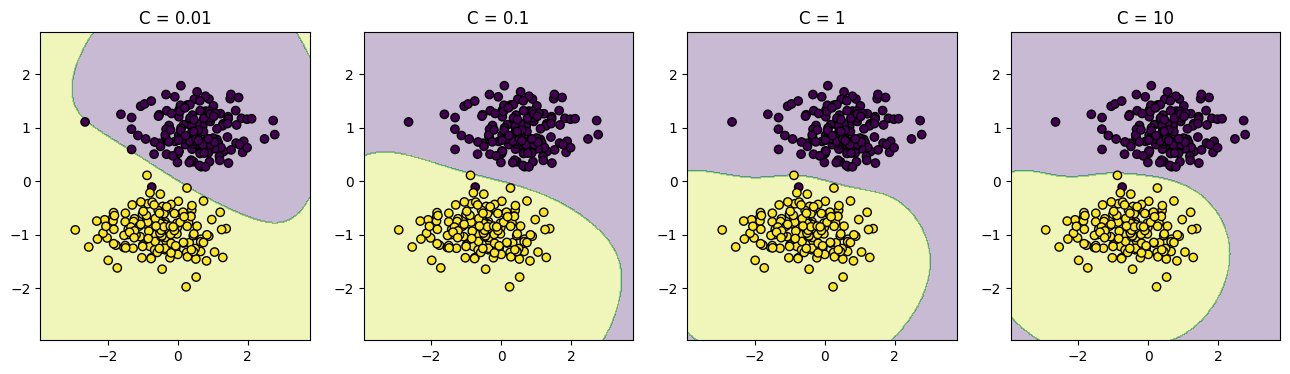

In [10]:
# 27  Train SVM Classifier with different C values and compare decision boundaries visually

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

X, y = make_blobs(n_samples=300, centers=2, random_state=6, cluster_std=1.2)
scaler = StandardScaler(); X = scaler.fit_transform(X)

Cs = [0.01, 0.1, 1, 10]
fig, axes = plt.subplots(1, len(Cs), figsize=(16,4))
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300))

for ax, C in zip(axes, Cs):
    clf = SVC(kernel='rbf', C=C, gamma='scale')
    clf.fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
    ax.set_title(f"C = {C}")
plt.show()


In [11]:
# 28  Bernoulli Naïve Bayes classifier for binary features
# P8: BernoulliNB with synthetic binary dataset
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_redundant=0, random_state=42)
# binarize features
X_bin = (X > X.mean(axis=0)).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X_bin, y, test_size=0.3, random_state=42, stratify=y)

bnb = BernoulliNB(alpha=1.0)
bnb.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, bnb.predict(X_test)))


Accuracy: 0.7


In [12]:
# 29  Apply feature scaling before training SVM and compare to unscaled data
# P9: Compare scaling impact
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score

data = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Unscaled
clf_raw = SVC(kernel='rbf', gamma='scale')
clf_raw.fit(X_train, y_train)
acc_raw = accuracy_score(y_test, clf_raw.predict(X_test))

# Scaled
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
clf_scaled = SVC(kernel='rbf', gamma='scale')
clf_scaled.fit(X_train_s, y_train)
acc_scaled = accuracy_score(y_test, clf_scaled.predict(X_test_s))

print("Unscaled accuracy:", acc_raw)
print("Scaled accuracy:", acc_scaled)


Unscaled accuracy: 0.6666666666666666
Scaled accuracy: 0.9814814814814815


In [13]:
# 30 Gaussian NB predictions before and after Laplace Smoothing
# P10: MultinomialNB with and without Laplace smoothing (alpha)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

docs = ["spamoffer cheap meds","cheap meds now","limited offer just for you","meet me tonight", "dinner tonight", "let's go out"]
labels = [1,1,1,0,0,0]  # 1=spam,0=ham

cv = CountVectorizer()
X = cv.fit_transform(docs)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.33, random_state=42)

mnb_no = MultinomialNB(alpha=0.0)  # no smoothing
mnb_yes = MultinomialNB(alpha=1.0) # Laplace smoothing

mnb_no.fit(X_train, y_train)
mnb_yes.fit(X_train, y_train)

print("No smoothing acc:", accuracy_score(y_test, mnb_no.predict(X_test)))
print("Laplace smoothing acc:", accuracy_score(y_test, mnb_yes.predict(X_test)))


No smoothing acc: 0.0
Laplace smoothing acc: 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


In [14]:
# 31  SVM + GridSearchCV to tune hyperparameters (C, gamma, kernel)
# P11: GridSearchCV for SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42, stratify=data.target)

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf', 'poly']
}
grid = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Test accuracy:", grid.score(X_test, y_test))


Best params: {'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}
Test accuracy: 0.9629629629629629


In [15]:
# 32  SVM on imbalanced dataset with class weighting
# P12: Class weights on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.95, 0.05], flip_y=0,
                           n_features=20, n_informative=3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

clf_no = SVC(class_weight=None, random_state=42)
clf_wt = SVC(class_weight='balanced', random_state=42)

clf_no.fit(X_train, y_train)
clf_wt.fit(X_train, y_train)

print("Without class_weight:\n", classification_report(y_test, clf_no.predict(X_test)))
print("With class_weight='balanced':\n", classification_report(y_test, clf_wt.predict(X_test)))


Without class_weight:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       285
           1       1.00      0.53      0.70        15

    accuracy                           0.98       300
   macro avg       0.99      0.77      0.84       300
weighted avg       0.98      0.98      0.97       300

With class_weight='balanced':
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       285
           1       0.62      0.67      0.65        15

    accuracy                           0.96       300
   macro avg       0.80      0.82      0.81       300
weighted avg       0.96      0.96      0.96       300



In [16]:
# 33  Naïve Bayes classifier for spam detection using email data (toy)
# P13: Simple spam detection (toy)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

emails = [
 "free money now", "cheap meds now", "earn $$ fast", "meeting schedule tomorrow", "project deadline", "let's have lunch"
]
labels = [1,1,1,0,0,0]  # 1=spam,0=ham

vec = TfidfVectorizer()
X = vec.fit_transform(emails)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.33, random_state=42)

clf = MultinomialNB(alpha=1.0)
clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [17]:
# 34  Train SVM and Naïve Bayes on same dataset and compare accuracy
# P14: SVM vs Naive Bayes on 20 Newsgroups subset
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cats = ['rec.sport.baseball', 'rec.sport.hockey', 'sci.space', 'comp.graphics']
data_train = fetch_20newsgroups(subset='train', categories=cats, remove=('headers','footers','quotes'))
data_test = fetch_20newsgroups(subset='test', categories=cats, remove=('headers','footers','quotes'))

# Multinomial NB
mnb = make_pipeline(TfidfVectorizer(), MultinomialNB(alpha=1.0))
mnb.fit(data_train.data, data_train.target)
mnb_acc = accuracy_score(data_test.target, mnb.predict(data_test.data))

# SVM
svm_pipe = make_pipeline(TfidfVectorizer(), SVC(kernel='linear', C=1.0))
svm_pipe.fit(data_train.data, data_train.target)
svm_acc = accuracy_score(data_test.target, svm_pipe.predict(data_test.data))

print("MultinomialNB accuracy:", mnb_acc)
print("SVM (linear) accuracy:", svm_acc)


MultinomialNB accuracy: 0.8891703609879671
SVM (linear) accuracy: 0.8581380620645979


In [ ]:
# 35  Feature selection before training Naïve Bayes (RFE example) and compare
# P15: RFE + Naive Bayes (on numeric dataset)
from sklearn.datasets import load_wine
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42, stratify=data.target)

# Use LogisticRegression as estimator for RFE
est = LogisticRegression(max_iter=1000)
rfe = RFE(est, n_features_to_select=8)
rfe.fit(X_train, y_train)

gnb = GaussianNB()
gnb.fit(rfe.transform(X_train), y_train)

print("Accuracy after RFE:", accuracy_score(y_test, gnb.predict(rfe.transform(X_test))))


In [18]:
# 36  SVM with OvR and OvO strategies on Wine dataset
# P16: OvR vs OvO (sklearn uses OvO by default for SVC; LinearSVC uses OvR)
from sklearn.datasets import load_wine
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42, stratify=data.target)

# OvO (default for SVC)
svc_ovo = SVC(decision_function_shape='ovo', kernel='rbf', random_state=42)
svc_ovo.fit(X_train, y_train)

# OvR using OneVsRestClassifier with LinearSVC
ovr = OneVsRestClassifier(LinearSVC(max_iter=5000, random_state=42))
ovr.fit(X_train, y_train)

print("OvO accuracy:", accuracy_score(y_test, svc_ovo.predict(X_test)))
print("OvR accuracy:", accuracy_score(y_test, ovr.predict(X_test)))


OvO accuracy: 0.6666666666666666
OvR accuracy: 0.9444444444444444


In [13]:
# 37  Train SVM with Linear, Polynomial, and RBF kernels on Breast Cancer dataset and compare accuracy
# P17: Compare kernels on Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42, stratify=data.target)

kernels = ['linear', 'poly', 'rbf']
for k in kernels:
    if k == 'poly':
        clf = SVC(kernel=k, degree=3, random_state=42)
    else:
        clf = SVC(kernel=k, random_state=42)
    clf.fit(X_train, y_train)
    print(f"{k} kernel accuracy:", accuracy_score(y_test, clf.predict(X_test)))

linear kernel accuracy: 0.9532163742690059
poly kernel accuracy: 0.9064327485380117
rbf kernel accuracy: 0.9064327485380117


In [3]:
# 38  Stratified K-Fold Cross-Validation average accuracy for SVM

# P18: Stratified K-Fold CV average accuracy
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import load_wine
import numpy as np

data = load_wine()
clf = SVC(kernel='rbf', C=1.0, gamma='scale')
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, data.data, data.target, cv=skf)
print("CV scores:", scores)
print("Mean CV accuracy:", np.mean(scores))


CV scores: [0.63888889 0.69444444 0.63888889 0.65714286 0.74285714]
Mean CV accuracy: 0.6744444444444444


In [4]:
# 39  Naïve Bayes with different prior probabilities and compare
# P19: Naive Bayes with different priors (Gaussian)
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42, stratify=data.target)

# default priors (learned)
gnb_default = GaussianNB()
gnb_default.fit(X_train, y_train)

# user-specified priors (e.g., uniform)
priors = [1/3,1/3,1/3]
gnb_uniform = GaussianNB(priors=priors)
gnb_uniform.fit(X_train, y_train)

print("Default priors accuracy:", accuracy_score(y_test, gnb_default.predict(X_test)))
print("Uniform priors accuracy:", accuracy_score(y_test, gnb_uniform.predict(X_test)))


Default priors accuracy: 0.9111111111111111
Uniform priors accuracy: 0.9111111111111111


In [5]:
# 40  Recursive Feature Elimination (RFE) before SVM and compare accuracy
# P20: RFE + SVM
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42, stratify=data.target)

svc = SVC(kernel='linear')
rfe = RFE(estimator=svc, n_features_to_select=8)
rfe.fit(X_train, y_train)

svc.fit(rfe.transform(X_train), y_train)
print("Accuracy with RFE features:", accuracy_score(y_test, svc.predict(rfe.transform(X_test))))


Accuracy with RFE features: 0.9074074074074074


In [6]:
#41  Train SVM and evaluate Precision, Recall, F1-score (instead of accuracy)
# P21: Precision, Recall, F1 for SVM
from sklearn.metrics import precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42, stratify=data.target)

clf = SVC(kernel='rbf', probability=True, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
p, r, f, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print("Precision:", p, "Recall:", r, "F1-score:", f)


Precision: 0.8888888888888888 Recall: 0.9719626168224299 F1-score: 0.9285714285714286


In [7]:
# 42 Train Naïve Bayes and evaluate Log Loss (Cross-Entropy)
# P22: Log loss for Naive Bayes
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42, stratify=data.target)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
probs = gnb.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, probs))


Log Loss: 0.33819522327849955


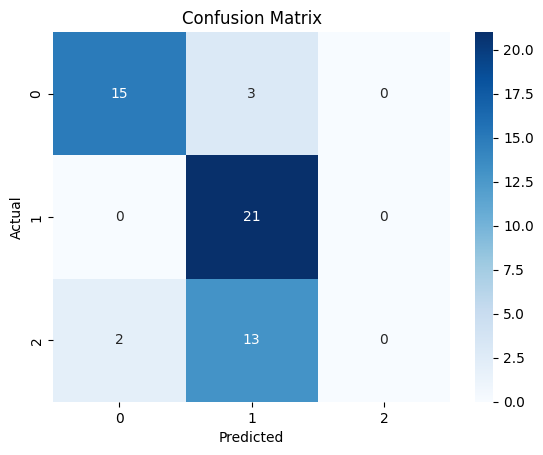

In [8]:
# 43 SVM Confusion Matrix visualization using seaborn
# P23: Confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42, stratify=data.target)

clf = SVC(kernel='rbf', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')
plt.show()


In [9]:
# 44 SVR evaluate using MAE instead of MSE
# P24: SVR with MAE metric
from sklearn.svm import SVR
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=100, gamma='scale')
svr.fit(X_train_s, y_train)
y_pred = svr.predict(X_test_s)
print("MAE:", mean_absolute_error(y_test, y_pred))


MAE: 0.370788136890826


In [10]:
#45  Naïve Bayes ROC-AUC evaluation
# P25: ROC-AUC for GaussianNB
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42, stratify=data.target)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
probs = gnb.predict_proba(X_test)[:,1]
print("ROC-AUC:", roc_auc_score(y_test, probs))


ROC-AUC: 0.990070093457944


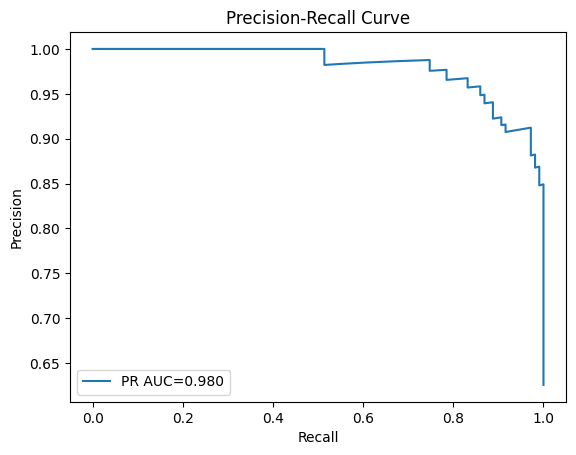

In [11]:
# 46  SVM Precision-Recall Curve visualization
# P26: Precision-Recall curve for SVM
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42, stratify=data.target)

clf = SVC(kernel='rbf', probability=True, random_state=42)
clf.fit(X_train, y_train)
probs = clf.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test, probs)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, label=f'PR AUC={pr_auc:.3f}')
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Precision-Recall Curve')
plt.legend(); plt.show()
